In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
db=mysql.connector.connect (host="localhost",
                            username="root",
                            password="pavankumar",
                            database="ecommerce1")
cur=db.cursor()



# List all unique cities where customers are located. 



In [37]:
query="""select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["cities"])
df.head()

,cities
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017


In [11]:
query="""select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()
"total orders placed in 2017 ",data[0][0]

('total orders placed in 2017 ', 90202)

# Find the total sales per category.

In [42]:
query="""select products.product_category as category,sum(payments.payment_value) as sales from products join order_items on 
 products.product_id=order_items.product_id join payments on payments.order_id=order_items.order_id group by
 category """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["product_category","sales"])
df["sales"]=df["sales"].astype(int)
df

,product_category,sales
0,perfumery,506738
1,Furniture Decoration,1430176
2,telephony,486882
3,bed table bath,1712553
4,automotive,852294
...,...,...
69,cds music dvds,1199
70,La Cuisine,2913
71,Fashion Children's Clothing,785
72,PC Gamer,2174


# Calculate the percentage of orders that were paid in installments.

In [49]:
query="""select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 from payments"""
cur.execute(query)
data=cur.fetchall()
"percentage of orders that were paid in installments: ",data[0][0]

('percentage of orders that were paid in installments: ', Decimal('99.9981'))

# Count the number of customers from each state. 

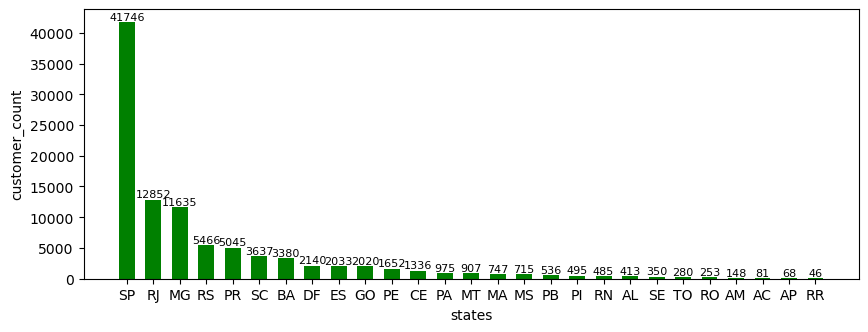

In [71]:
query="select customer_state,count(customer_id) from customers group by customer_state"
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data , columns=["state","customer_count"])
df=df.sort_values(by="customer_count" ,ascending=False)
plt.figure(figsize=(10, 3.5))
x=plt.bar(df["state"],df["customer_count"],width=0.6,color='g')
plt.xlabel("states")
plt.ylabel("customer_count")
plt.bar_label(x,fontsize=8)
plt.show()

# Calculate the number of orders per month in 2018.

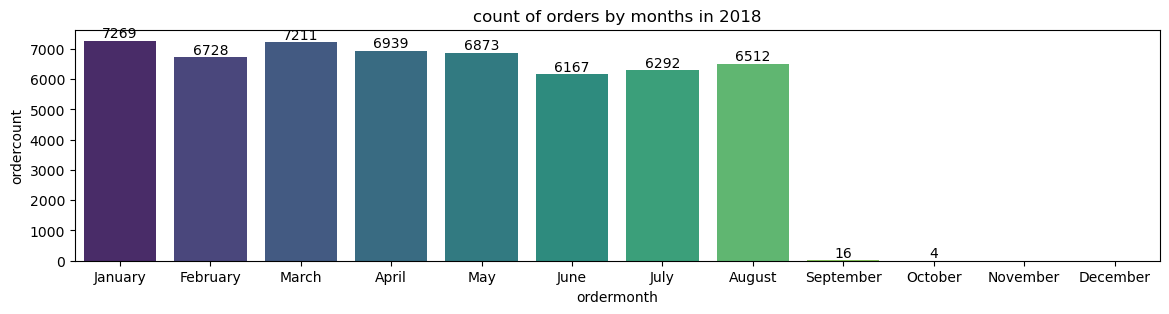

In [62]:
query="""select month(order_purchase_timestamp) as order_month, count(DISTINCT order_id) as order_count from orders where year(order_purchase_timestamp)=2018 group by order_month"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data ,columns=["ordermonth","ordercount"])
o=["January", "February", "March","April", "May", "June", "July", "August", "September", "October", "November", "December"]

df["ordermonth"] = df["ordermonth"].apply(lambda x: o[x-1])
plt.figure(figsize=(14,3))
ax=sns.barplot(x = "ordermonth",y =  "ordercount", data = df, order = o, color = "red", hue=df["ordermonth"],palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.title("count of orders by months in 2018")
plt.show() 



# Find the average number of products per order, grouped by customer city.

In [93]:

query = """
WITH count_per_order AS 
(
    SELECT  orderstb.order_id, orderstb.customer_id, COUNT(order_items.order_id) AS oc
    FROM orderstb
    JOIN order_items ON orderstb.order_id = order_items.order_id
    GROUP BY orderstb.order_id, orderstb.customer_id
)

SELECT customers.customer_city, 
       ROUND(AVG(count_per_order.oc), 2) AS average_orders
FROM customers
JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city 
ORDER BY average_orders DESC;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["customer city", "average products/order"])
df


,customer city,average products/order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
...,...,...
4105,lagoa da canoa,1.00
4106,japaratuba,1.00
4107,sebastiao leal,1.00
4108,morro agudo de goias,1.00


# Calculate the percentage of total revenue contributed by each product category.

In [4]:
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df


,Category,percentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# Identify the correlation between product price and the number of times a product has been purchased.


In [34]:
query="select products.product_category,count(order_items.product_id),avg(order_items.price) from products join order_items on products.product_id=order_items.product_id group by product_category"
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["category","order_count","avg price"])
arr1=df["order_count"]
arr2=df["avg price"]
a=np.corrcoef([arr1,arr2])
print(df)
print("coorelation between price and arders_count",a[0][-1],"so the corelation is neutral")

                           category  order_count   avg price
0                     HEALTH BEAUTY         9670  130.163531
1                     sport leisure         8641  114.344285
2                        Cool Stuff         3796  167.357969
3              computer accessories         7827  116.513903
4                   Watches present         5991  201.135984
..                              ...          ...         ...
69                          flowers           33   33.637576
70  Kitchen portable and food coach           15  264.568666
71                  House Comfort 2           30   25.342333
72       CITTE AND UPHACK FURNITURE           38  114.949473
73                   cds music dvds           14   52.142857

[74 rows x 3 columns]
coorelation between price and arders_count -0.10631552237549534 so the corelation is neutral


# Calculate the total revenue generated by each seller, and rank them by revenue.

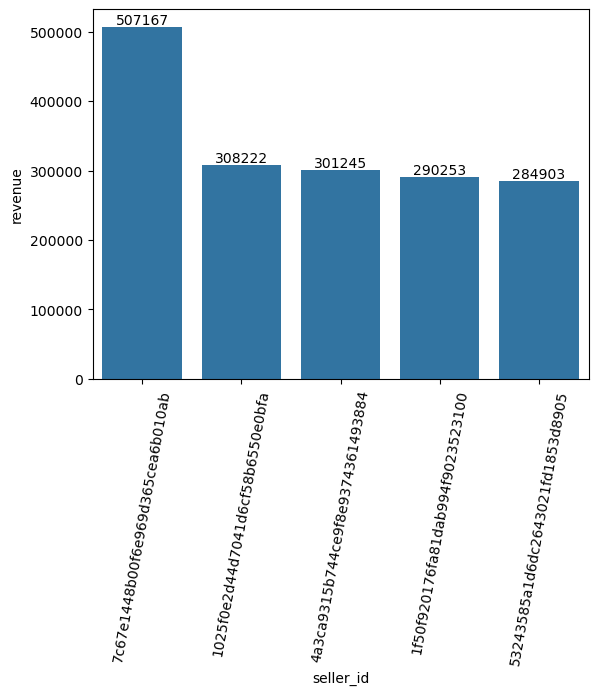

In [63]:
query=""" select *,DENsE_RANK() over(order by revenue desc) from (select order_items.seller_id,sum(payments.payment_value) as revenue from
order_items join payments on 
order_items.order_id=payments.order_id 
group by order_items.seller_id) as a"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data ,columns=["seller_id","revenue","rank"])
df=df.head(5)
a=sns.barplot(x=df["seller_id"],y=df["revenue"],data=df)
plt.xticks(rotation=80)
for container in a.containers:
    a.bar_label(container)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [16]:
query=""" select customer_id,order_purchase_timestamp,payment,round(avg(payment) over(partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row),2) as mov_avg from
(select orderstb.customer_id ,orderstb.order_purchase_timestamp,payments.payment_value as payment 
from payments join orderstb
on payments.order_id=orderstb.order_id)as a;"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["customer_id","date","payment","mov_avg"] )
df

,customer_id,date,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


# Calculate the cumulative sales per month for each year

In [50]:
query="""select years,months,payments,format(sum(payments) over(partition by years order by years,months),4) as cumsum from

(select year(orderstb.order_purchase_timestamp) as years,month(orderstb.order_purchase_timestamp) as months,sum(payments.payment_value) as payments from payments join orderstb 
on orderstb.order_id=payments.order_id  group by months,years order by years,months) as a"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["year","month","sales","cummulative sales"])
df

,year,month,sales,cummulative sales
0,2016,9,2.522400e+02,252.2400
1,2016,10,5.909048e+04,"59,342.7200"
2,2016,12,1.962000e+01,"59,362.3400"
3,2017,1,1.384880e+05,"138,488.0401"
4,2017,2,2.919080e+05,"430,396.0496"
5,2017,3,4.498636e+05,"880,259.6491"
6,2017,4,4.177880e+05,"1,298,047.6786"
7,2017,5,5.929188e+05,"1,890,966.4987"
8,2017,6,5.112764e+05,"2,402,242.8791"
9,2017,7,5.923829e+05,"2,994,625.7986"


# Calculate the year-over-year growth rate of total sales.

   years       sales  previous year sales  growth% by year
0   2016    59362.34                  NaN              NaN
1   2017  7249746.73             59362.34     12112.703761
2   2018  8699763.05           7249746.73        20.000924


<function matplotlib.pyplot.show(close=None, block=None)>

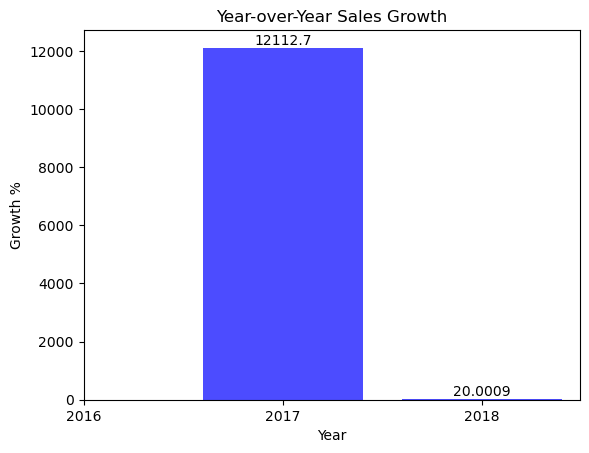

In [79]:
query="""select years,sales,lag(sales,1)over(order by years),
(sales-lag(sales,1)over(order by years))/lag(sales,1)over(order by years)*100 as year_over_year_growth  
from 
(select year(orderstb.order_purchase_timestamp)as years,round(sum(payments.payment_value),2) as sales from payments join orderstb 
on payments.order_id=orderstb.order_id group by years order by years) as a"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["years","sales","previous year sales","growth% by year"])
print(df)
x=plt.bar(df["years"], df["growth% by year"], color="blue", alpha=0.7)

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Growth %")
plt.title("Year-over-Year Sales Growth")
plt.xticks(df["years"])
plt.bar_label(x)
plt.show

# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [80]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

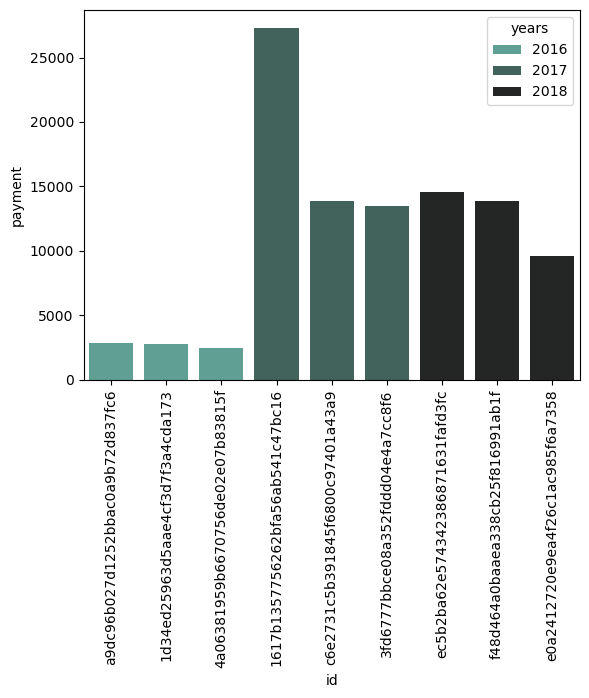

In [13]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years",palette="dark:#5A9_r")
plt.xticks(rotation = 90)
plt.show()